Name : Atharva Belge <br> Roll No: 07

### Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
df = pd.read_csv('edu.csv')

In [4]:
df

,name,branch,gender,m1,m2,m3,percentage
0,akshay,computer,male,70.0,80.0,50.0,66.666667
1,atul,computer,male,50.0,NaN,38.0,29.333333
2,piyush,computer,male,70.0,80.0,40.0,63.333333
3,ayushi,computer,female,45.0,46.0,49.0,46.666667
4,prathamesh,IT,NaN,57.0,75.0,67.0,66.333333
5,sakshi,IT,female,NaN,68.0,68.0,45.333333
6,mansi,Civil,female,82.0,45.0,68.0,65.000000
7,swara,Electrical,female,78.0,83.0,97.0,86.000000
8,vivek,Mechanical,male,79.0,89.0,NaN,56.000000
9,sarthak,Mechanical,male,67.0,58.0,68.0,64.333333


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        13 non-null     object 
 1   branch      13 non-null     object 
 2   gender      12 non-null     object 
 3   m1          12 non-null     float64
 4   m2          12 non-null     float64
 5   m3          12 non-null     float64
 6   percentage  13 non-null     float64
dtypes: float64(4), object(3)
memory usage: 856.0+ bytes


In [6]:
df.isna().any()

name          False
branch        False
gender         True
m1             True
m2             True
m3             True
percentage    False
dtype: bool

In [7]:
df = df.dropna()

In [8]:
df

,name,branch,gender,m1,m2,m3,percentage
0,akshay,computer,male,70.0,80.0,50.0,66.666667
2,piyush,computer,male,70.0,80.0,40.0,63.333333
3,ayushi,computer,female,45.0,46.0,49.0,46.666667
6,mansi,Civil,female,82.0,45.0,68.0,65.000000
7,swara,Electrical,female,78.0,83.0,97.0,86.000000
9,sarthak,Mechanical,male,67.0,58.0,68.0,64.333333
10,vaibhav,IT,male,66.0,87.0,78.0,77.000000
11,shubhangi,Civil,female,67.0,78.0,79.0,74.666667
12,sumit,Electrical,male,68.0,78.0,54.0,66.666667


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='m3'>

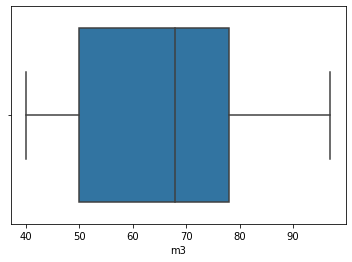

In [10]:
sb.boxplot(df['m3'])

In [11]:
df = df.sort_values('m3')
df

,name,branch,gender,m1,m2,m3,percentage
2,piyush,computer,male,70.0,80.0,40.0,63.333333
3,ayushi,computer,female,45.0,46.0,49.0,46.666667
0,akshay,computer,male,70.0,80.0,50.0,66.666667
12,sumit,Electrical,male,68.0,78.0,54.0,66.666667
6,mansi,Civil,female,82.0,45.0,68.0,65.000000
9,sarthak,Mechanical,male,67.0,58.0,68.0,64.333333
10,vaibhav,IT,male,66.0,87.0,78.0,77.000000
11,shubhangi,Civil,female,67.0,78.0,79.0,74.666667
7,swara,Electrical,female,78.0,83.0,97.0,86.000000


In [12]:
q1 = np.percentile(df['m3'], 25)
q2 = np.percentile(df['m3'], 50)
q3 = np.percentile(df['m3'], 75)
print(q1,"\t", q2,"\t", q3)

50.0 	 68.0 	 78.0


In [13]:
IQR = q3 - q1
IQR

28.0

In [14]:
lower_bound = q1-1.5*IQR
upper_bound = q3-1.5*IQR
print(lower_bound, " ", upper_bound)

8.0   36.0


In [15]:
df

,name,branch,gender,m1,m2,m3,percentage
2,piyush,computer,male,70.0,80.0,40.0,63.333333
3,ayushi,computer,female,45.0,46.0,49.0,46.666667
0,akshay,computer,male,70.0,80.0,50.0,66.666667
12,sumit,Electrical,male,68.0,78.0,54.0,66.666667
6,mansi,Civil,female,82.0,45.0,68.0,65.000000
9,sarthak,Mechanical,male,67.0,58.0,68.0,64.333333
10,vaibhav,IT,male,66.0,87.0,78.0,77.000000
11,shubhangi,Civil,female,67.0,78.0,79.0,74.666667
7,swara,Electrical,female,78.0,83.0,97.0,86.000000


In [16]:
np.max(df['m3']) 

97.0

In [17]:
df = df.replace(np.max(df['m3']), np.median(df['m3']))

In [18]:
df

,name,branch,gender,m1,m2,m3,percentage
2,piyush,computer,male,70.0,80.0,40.0,63.333333
3,ayushi,computer,female,45.0,46.0,49.0,46.666667
0,akshay,computer,male,70.0,80.0,50.0,66.666667
12,sumit,Electrical,male,68.0,78.0,54.0,66.666667
6,mansi,Civil,female,82.0,45.0,68.0,65.000000
9,sarthak,Mechanical,male,67.0,58.0,68.0,64.333333
10,vaibhav,IT,male,66.0,87.0,78.0,77.000000
11,shubhangi,Civil,female,67.0,78.0,79.0,74.666667
7,swara,Electrical,female,78.0,83.0,68.0,86.000000
